In [1]:
# Create a dictionary that contains ZINC ids and affinities against HIV protease
F = open('HIVpr_activities.csv','r')
lines = F.read().split('\n')[1:]
F.close()
HIVProteaseActivities = {}
for line in lines:
  cols = line.split(',')
  if len(cols)>2:
    HIVProteaseActivities[cols[0]] = float(cols[3])

In [2]:
# Create a list that contains ZINC ids for the library
F = open('../library/dbfda-world.sdf','r')
lines = F.read().split('\n')
F.close()
ZINC_ids = [line for line in lines if line.startswith('ZINC')]

In [3]:
# Create a dictionary that contains Vina scores for all FDA approved drugs
def getVinaScore(pdbqt_FN):
  F = open(pdbqt_FN,'r')
  line = F.readline()
  while not line.startswith('REMARK VINA RESULT:'):
    line = F.readline()
  F.close()
  score = float(line.split()[3])
  return score
  
import os
import glob
pdbqt_FNs = glob.glob('../docked/*.pdbqt')
# All the docked files start with hsg1_dbfda, which has 10 characters
VinaScores = dict([(ZINC_ids[int(os.path.basename(FN)[10:-6])-1],getVinaScore(FN)) for FN in pdbqt_FNs])

In [4]:
HIVProteaseDrugs = list(set(VinaScores.keys()).intersection(set(HIVProteaseActivities.keys())))

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

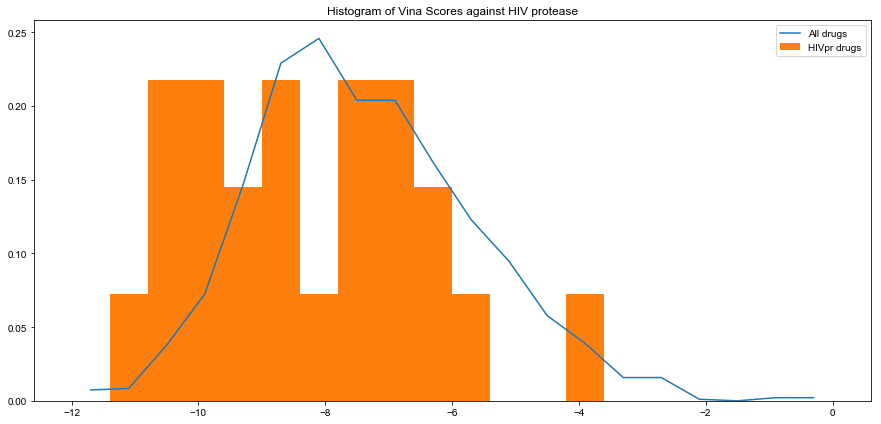

In [6]:
(density, edges) = np.histogram(VinaScores.values(), density=True, range=(-12,0), bins=20)
plt.figure(figsize=(15,7))
plt.plot(edges[:-1]+(edges[1]-edges[0])/2,density)
plt.hist([VinaScores[ZINC_ID] for ZINC_ID in HIVProteaseDrugs], density=True, range=(-12,0), bins=20)
plt.title('Histogram of Vina Scores against HIV protease')
plt.legend(['All drugs','HIVpr drugs'])

In [7]:
print 'We have virtually screened %d FDA-approved HIV protease inhibitors against HIV protease'%len(HIVProteaseDrugs)
print 'The Vina score of the positive control indinavir is', VinaScores['ZINC000022448696']

We have virtually screened 23 FDA-approved HIV protease inhibitors against HIV protease
The Vina score of the positive control indinavir is -9.7


In [8]:
lowestScoring = [(key, VinaScores[key]) for key in VinaScores.keys() if VinaScores[key]<-10]
print 'There are %d FDA-approved drugs with a Vina score'%(len(lowestScoring))
print 'against HIV protease of less than -10 kcal/mol,'
print 'of which %d are HIV protease drugs'%(np.sum([x[0] in HIVProteaseDrugs for x in lowestScoring]))

print '\nThey are:'
lowestScoring.sort(key=lambda x:x[1])
print '\n'.join(['%s\t%s'%(x[0],x[1]) for x in lowestScoring])

There are 71 FDA-approved drugs with a Vina score
against HIV protease of less than -10 kcal/mol,
of which 4 are HIV protease drugs

They are:
ZINC000052955754	-12.0
ZINC000100073786	-11.9
ZINC000012503187	-11.8
ZINC000003927200	-11.7
ZINC000003931840	-11.5
ZINC000253632968	-11.5
ZINC000100013500	-11.5
ZINC000085537053	-11.4
ZINC000003784182	-11.4
ZINC000003932831	-11.2
ZINC000003985982	-11.2
ZINC000001530886	-11.2
ZINC000169289767	-11.1
ZINC000006716957	-11.1
ZINC000003914596	-10.9
ZINC000026985532	-10.8
ZINC000003978005	-10.7
ZINC000001481956	-10.7
ZINC000003920266	-10.7
ZINC000027990463	-10.7
ZINC000027428713	-10.6
ZINC000003816514	-10.6
ZINC000019632618	-10.6
ZINC000003918087	-10.6
ZINC000100003902	-10.6
ZINC000100016058	-10.6
ZINC000013911941	-10.6
ZINC000150338755	-10.5
ZINC000004175630	-10.5
ZINC000053683151	-10.5
ZINC000111460375	-10.5
ZINC000100017856	-10.5
ZINC000004474460	-10.4
ZINC000100022637	-10.4
ZINC000005844788	-10.4
ZINC000011679756	-10.4
ZINC000001493878	-10.4
ZINC00

Text(0,0.5,'-RT log(IC50) (kcal/mol)')

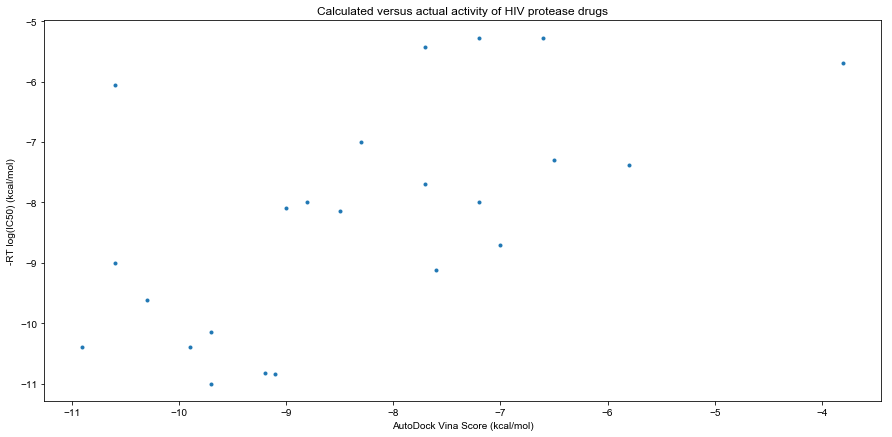

In [9]:
plt.figure(figsize=(15,7))
plt.plot([VinaScores[zn] for zn in HIVProteaseDrugs],[-HIVProteaseActivities[zn] for zn in HIVProteaseDrugs],'.')
plt.title('Calculated versus actual activity of HIV protease drugs')
plt.xlabel('AutoDock Vina Score (kcal/mol)')
plt.ylabel('-RT log(IC50) (kcal/mol)')